In [204]:
import pandas as pd
%matplotlib notebook
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file
from bokeh.charts import Bar, output_file, show
import bokeh.plotting as bplt
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import Label, Title
import itertools  
from bokeh.layouts import gridplot,row,column

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from bokeh.io import output_notebook
plt.style.use('ggplot')
output_notebook()

Loading BokehJS ...

In [159]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'

def plot_producer(producer_dir,producer_filename,p_number,fig_count,txt):
    
    rates =pd.read_csv(directory + producer_dir + producer_filename)
    x_values = rates['Num_Messages'].tolist()
    y_values = rates['KB/sec'].tolist()
    
    f = plt.figure()
    plt.xlim(0,12500)
    plt.plot(x_values,y_values)
    plt.ylabel('KB/s')
    plt.xlabel('Msg number')
    plt.title("Producer " + str(p_number)+ "  throughput")
    text = 'Figure ' + str(fig_count) + ' : ' + txt
    f.text(.20, .02, text, ha='center')
    
    return (x_values,y_values)

In [259]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
def plot_scheduling_and_Total_Delay(spark_metrics_dir,fig_count,title):
    
    metrics = pd.read_csv(directory + spark_metrics_dir ,skipinitialspace=True)
    scheduling_delay = metrics['SchedulingDelay'].tolist()    
    TotalDelay = metrics['TotalDelay'].tolist()
    
    scheduling_delay = map(lambda x: x/1000, scheduling_delay)  # convert sec from milisec
    TotalDelay = map(lambda x: x/1000, TotalDelay)
    
    processing_time = []
    for i in xrange(len(scheduling_delay)):
        el = TotalDelay[i] - scheduling_delay[i]
        processing_time.append(el)

    x_values = range(0,metrics['SchedulingDelay'].count())
    # create a new plot with a title and axis labels
    p = figure(title="Figure " + str(fig_count) + ": Spark Scheduling delay " + title, x_axis_label='miniBatch Number', y_axis_label='Delay in sec')
    # add a line renderer with legend and line thickness
    p.line(x_values, scheduling_delay, legend="Scheduling Delay", line_width=2,line_color="red")
    p.line(x_values,TotalDelay,legend="Total Delay", line_width=2)
    p.line(x_values,processing_time,legend="Processing Time", line_width=2,line_color='green') # in seconds
    #throughput = (TotalDelay - scheduling_delay)/metrics['NumberRecords']
    bplt.show(p)
    return (x_values,scheduling_delay)

In [235]:
def plot_throughput_per_mini_batch(spark_metrics_dir,fig_count):
    
    metrics = pd.read_csv(directory + spark_metrics_dir ,skipinitialspace=True)
    scheduling_delay = metrics['SchedulingDelay']
    TotalDelay = metrics['TotalDelay']
    x_values = range(0,scheduling_delay.count())    
    throughput = metrics['NumberRecords']/60      # check That
    # create a new plot with a title and axis labels
    p = figure(title="Figure " + str(fig_count) + " : Spark throughput/mini batch  - batch=60sec", x_axis_label='miniBatch Number', y_axis_label='records/sec')

    # add a line renderer with legend and line thickness
    p.line(x_values, throughput.tolist(), legend="Throughput", line_width=2,line_color="green")

    # show the results
    bplt.show(p)
    return  (x_values,throughput.tolist())

#### Terminology remainder

Processing Time: The time it takes to compute a given batch for all its jobs, end to end. Example: this means a single job which starts at flatMap and ends at saveAsTextFile, and assumes as a prerequisite that the job has been submitted. <br>  <br>
Scheduling Delay: The time taken by Spark Streaming scheduler to submit the jobs of the batch. How is this computed? As we've said, our batch reads from the source every 60 seconds. Now let's assume that a given batch took 80 seconds to compute. This means that we're now 80 - 60 = 20 seconds behind, thus making the scheduling delay 20 seconds long. <br> <br>
Total Delay: This is Scheduling Delay + Processing Time. Following the same example, if we're 20 seconds behind, meaning our scheduling delay is 20 seconds, and the next batch took another 80 seconds to compute, this means that the total delay is now 70 + 40 = 110 seconds long <br> 

Record: 1 record is one Kafka message. <br>
1 Kafka message is an array of 500 3-dim points

### Goal is:

There is no scheduling delay (C), or it's only increasing occasionally and recovers quickly. <br>
The processing time (C) is almost as long as the batch interval (A) but stays below it.  <br>
The median streaming rate (B) is as high as possible without causing trouble for numbers 1 and 2.  <br>

# Spark Streaming  on 1 wrangler node

In [260]:
directory = directory + '1-node/'

<IPython.core.display.Javascript object>


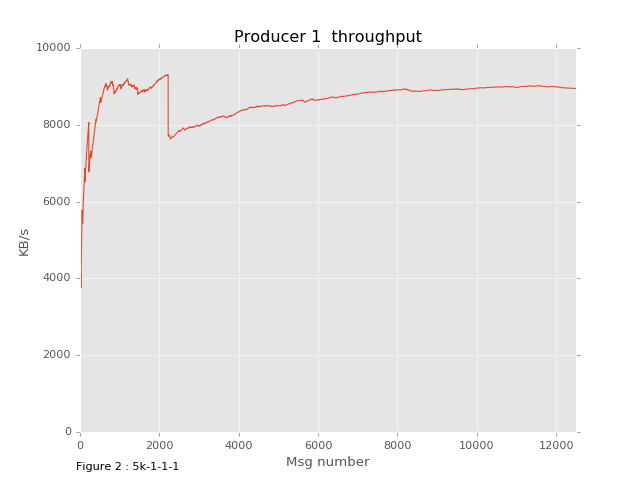

In [270]:
p_111_1_5k = plot_producer('/1-1-1/producer-1/','stdout-20171003-153435.csv',1,2,'5k-1-1-1')
#p_311_1_5k = plot_producer('3-1-1/producers/producer-1/','stdout-20171004-213507.csv',1,2,'5k-1-1-1')
#p_311_2_5k = plot_producer('3-1-1/producers/producer-2/','stdout-20171004-213507.csv',2,3,'5k-1-1-1')
#p_311_3_5k = plot_producer('3-1-1/producers/producer-3/','stdout-20171004-213507.csv',3,4,'5k-1-1-1')


In [271]:
p = figure(title="Figure " + str(7) + ":Produers throughput in case 3-1-1 ", x_axis_label='msg Number', y_axis_label='throughput in KB/s')

p.line(p_311_1_5k[0], p_311_1_5k[1], legend="p-1", line_width=2,line_color="red")
p.line(p_311_2_5k[0], p_311_2_5k[1], legend="p-2", line_width=2,line_color="blue")
p.line(p_311_3_5k[0], p_311_3_5k[1], legend="p-3", line_width=2,line_color="green")


bplt.show(p)

In [ ]:
p211_5k = 

* Above is the data rate that 1 producer is producing. 

In [ ]:
p_111_1_5k = plot_producer('/1-1-1/producer-1/','stdout-20171003-153435.csv',1,2,'5k-1-1-1')

##### consumer  - Spark Scheduling Delay -  Total Delay - Processing time

In [237]:
#a111 = plot_throughput_per_mini_batch('/1-1-1/spark-metrics-20171003-153347.csv',1)
d111 = plot_scheduling_and_Total_Delay('/1-1-1/spark-metrics-20171003-153347.csv',1,'Machine: Wrangler, Nodes:1, case 1-1-1')

In the experiment above I am utilizng one wrangler node to do measure spark's consumer throughput and computation. I am running from 1 producer and scale up to 48 <br>
 * Each producer is producing 2.5GB of data (floats)
 * Application: Spark Streaming k-means with 1 Consumer Node
 * Message size is 5K 3-D points
 ##### Observations: 
 * The consumer needs a lot  less than 60 seconds to compute the data, that means that the batch window is too high (60 secs) and system is underperfoming.
 * 758 seconds or 12 minutes is the total time of data production. That is why the computation is high at the begining.
 ##### How it should be tuned
 * The batch window had to be smaller, or the producing rate should be higher, in order to feed the consumer with more data to process.


In [221]:
b111 = pd.read_csv(directory+'1-1-1/spark-metrics-20171003-153347.csv')
#b111

In [40]:
print 'Number of Records Consumed from Spark Consumer: %d ' % b111[' NumberRecords'].sum()

Number of Records Consumed from Spark Consumer: 5655 


In [153]:
print "In The plot below we notice that even with 3 producers both the processing time, and the scheduling delay are above limits"
print 'Remainder: our processing goal is less than 60 seconds'

In The plot below we notice that even with 3 producers both the processing time, and the scheduling delay are above limits
Remainder: our processing goal is less than 60 seconds


In [239]:
#a311 = plot_throughput_per_mini_batch('/3-1-1/spark-metrics-20171004-213423.csv',2)
d311 = plot_scheduling_and_Total_Delay('/3-1-1/spark-metrics-20171004-213423.csv',2,'case 3-1-1')

In the experiment above I am utilizng one wrangler node to do measure spark's consumer throughput and computation. <br>
 * Each producer is producing 2.5GB of data (floats)
 * Application: Spark Streaming k-means with 1 Consumer Node
 ##### Observations: 
 * In the beggining, the consumer needs 60 seconds to do the computations and there is no scheduling delay (optimum case)
 * After a few batches spark can't compute the data in 60 seconds ( decay factor is 1, so spark computes all the data from the beginning), and delay is introduced.
 * 813 seconds or 14 minutes is the total time of data production. That is why the computation is high at t.
 ##### How it should be tuned
 * The batch window had to be bigger, or the consumer should have been configured better.
 * All data are used from the beggingng (decay factor: a=1)


In [224]:
b311 = pd.read_csv(directory+'/3-1-1/spark-metrics-20171004-213423.csv')
#b311

In [50]:
print 'Number of Records Consumed from Spark Consumer: %d ' % b311[' NumberRecords'].sum()
print 'The number of producers is tripled but the consumption is increased by x3.4'

Number of Records Consumed from Spark Consumer: 19399 
The number of producers is tripled but the consumption is increased by x3.4


In [241]:
#a611 = plot_throughput_per_mini_batch('/6-1-1/spark-metrics-20171005-001351.csv',3)
d611 = plot_scheduling_and_Total_Delay('/6-1-1/spark-metrics-20171005-001351.csv',3,'case 6-1-1')

In the experiment above I am utilizng one wrangler node to do measure spark's consumer throughput and computation. <br>
 * Each producer is producing 2.5GB of data (floats)
 * Application: Spark Streaming k-means with 1 Consumer Node
 ##### Observations: 
 * The computation time per batch reached more than 200 sec, which is more than 3 times the given window.
 * The first two batches where computed in time. Then spark couldn't handle all these data. 
 * After a few batches spark can't compute the data in 60 seconds ( decay factor is 1, so spark computes all the data from the beginning), and delay is introduced.
 * 860 seconds or 15 minutes is the total time of data production. 
 * Number of Records/minibatch is not steady, but it is growing. Assumption: Because of the Higher than Expected processing time, more Data are batched and streamed to the spark consumer


In [228]:
b611 = pd.read_csv(directory+'/6-1-1/spark-metrics-20171005-001351.csv')
#b611

In [49]:
print 'Number of Records Consumed from Spark Consumer: %d ' % b611[' NumberRecords'].sum()
print 'The number of producers is doubled but the consumption is increased by x1.6'

Number of Records Consumed from Spark Consumer: 31612 
The number of producers is doubled but the consumption is increased by x1.6


In [245]:
#a1211 = plot_throughput_per_mini_batch('/12-1-1/spark-metrics-20171005-161813.csv',4)
d1211 = plot_scheduling_and_Total_Delay('/12-1-1/spark-metrics-20171005-161813.csv',4,'case 12-1-1')

In [218]:
b1211 = pd.read_csv(directory+'/12-1-1/spark-metrics-20171005-161813.csv')

print 'Number of Records Consumed from Spark Consumer: %d ' % b1211[' NumberRecords'].sum()
print 'The number of producers is doubled but the consumption is increased by 3.8' 

Number of Records Consumed from Spark Consumer: 266664 
The number of producers is doubled but the consumption is increased by 3.8


In [229]:
#b1211

In [230]:
#a2411 = plot_throughput_per_mini_batch('/24-1-1/spark-metrics-20171005-183434.csv',5)
d2411 = plot_scheduling_and_Total_Delay('/24-1-1/spark-metrics-20171005-183434.csv',5,'case 24-1-1')


In [60]:
b2411 = pd.read_csv(directory+'/24-1-1/spark-metrics-20171005-183434.csv')
print 'Number of Records Consumed from Spark Consumer: %d ' % b2411[' NumberRecords'].sum()
print 'The number of producers is doubled but the consumption is increased by 1.47' 

Number of Records Consumed from Spark Consumer: 179155 
The number of producers is doubled but the consumption is increased by 1.47


#### Throughput per minibatch on 1 - node

In [254]:
p = figure(title="Figure " + str(6) + ": Spark throuhgput per minibatch", x_axis_label='miniBatch Number', y_axis_label='throughput in Rec/per minibatch')

p.line(a111[0], a111[1], legend="1-1-1", line_width=2,line_color="red")
p.line(a311[0], a311[1], legend="3-1-1", line_width=2,line_color="blue")
p.line(a611[0], a611[1], legend="6-1-1", line_width=2,line_color="green")
p.line(a1211[0], a1211[1], legend="12-1-1", line_width=2,line_color="black")
p.line(a2411[0], a2411[1], legend="24-1-1", line_width=2,line_color="yellow")


bplt.show(p)

 In the experiment above I am utilizng one wrangler node to do measure spark's consumer throughput and computation. <br>
 * Each producer is producing 2.5GB of data (floats)
 * Application: Spark Streaming k-means with 1 Consumer Node
 * decay factor: a=1 ( recompute everything from the beggining)
 ##### Observations: 
 * More producers lead to higher throughput per minibatch.
 * On the other hand, the time to complete each minibatch, as we saw at the previous  plots is not the requested one.
 #### Next Test
 * Calculate the (throughput/second)/mini_batch to see the actual throughput of the consumer.

In [252]:
p = figure(title="Figure " + str(6) + ": Spark scheduling delay", x_axis_label='miniBatch Number', y_axis_label='Time in sec')

p.line(d111[0], d111[1], legend="1-1-1", line_width=2,line_color="red")
p.line(d311[0], d311[1], legend="3-1-1", line_width=2,line_color="blue")
p.line(d611[0], d611[1], legend="6-1-1", line_width=2,line_color="green")
p.line(d1211[0], d1211[1], legend="12-1-1", line_width=2,line_color="black")
p.line(d2411[0], d2411[1], legend="24-1-1", line_width=2,line_color="yellow")


bplt.show(p)

### Producers - total time to completion

In [175]:
life_times = [758,813,860,1207,1435,1619]

In [193]:
life_times = [758,813,860,1207,1435,1619] #print values
## create the dataframe
myDF_5k = pd.DataFrame(dict(Production_Rate=life_times,label=[1, 3, 6, 12,24,48]))


In [183]:
print 'Each producer is producing 22,223 messages.'
print 'Each message in  memory is 5000 points * 3-d * double precision FP = 5000*3*8B = 117KB'
print 'Therefore each producer is producing 2.5GB'


Each producer is producing 22,223 messages of 5K each
Therefore each producer is producing  111,115 MB, or 108GBs of data, which is almost the capacity of wrangler 


In [199]:
p = Bar(myDF_5k,values='Production_Rate',label='label', xlabel = 'producers', ylabel="time in sec", title='Machine: Wrangler - Nodes:1 - Producers total time to completion (weak scaling)')
show(p)

In the experiment above I am utilizng one wrangler node to do weak scalling on wrangler. I am running from 1 to 48 parallel producers. <br>
 * Each producer is producing 2.5GB of data (floats)
 * Application: Spark Streaming k-means with 1 Consumer Node
 ##### Observations: 
 * Up to 6 producers there isn't any perfomance overhead.
 * Above 6 producers there is a producing slowdown
 ##### Hypothesis
 * The broker can't handle the produce requests from all the producers, and an overhead is introduced. 

#### Processing Time - Producers